<a href="https://colab.research.google.com/github/MOHIT335448/Major-Project-1/blob/main/Major_Project(SmartKnower).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smartknow(Major Project)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/owid-covid-data (1).csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73789,ZWE,Africa,Zimbabwe,2021-03-05,36248.0,25.0,29.143,1484.0,1.0,3.000,2438.820,1.682,1.961,99.846,0.067,0.202,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1534.0,390899.0,26.300,0.103,1708.0,0.115,0.017,58.6,tests performed,31325.0,31325.0,NaN,667.0,2678.0,0.21,0.21,NaN,180.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73790,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,2439.627,0.807,1.942,99.913,0.067,0.211,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,392499.0,26.408,0.108,1750.0,0.118,0.016,60.6,tests performed,32014.0,32014.0,NaN,689.0,2330.0,0.22,0.22,NaN,157.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73791,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,2440.367,0.740,1.749,99.913,0.000,0.211,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32240.0,32240.0,NaN,226.0,1914.0,0.22,0.22,NaN,129.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73792,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.85

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                 3652
location                                     0
date                                         0
total_cases                               1070
new_cases                                 1072
new_cases_smoothed                        2073
total_deaths                             10248
new_deaths                               10090
new_deaths_smoothed                       2073
total_cases_per_million                   1467
new_cases_per_million                     1469
new_cases_smoothed_per_million            2465
total_deaths_per_million                 10632
new_deaths_per_million                   10474
new_deaths_smoothed_per_million           2465
reproduction_rate                        14316
icu_patients                             66155
icu_patients_per_million                 66155
hosp_patients                            64609
hosp_patients_per_million                64609
weekly_icu_ad

In [ ]:
df.rename(columns = {'total_cases' : 'y','date':'ds'},inplace = True)

In [ ]:
df=df.iloc[30325:30728,:]
df

,iso_code,continent,location,ds,y,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30325,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30326,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30327,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30328,IND,Asia,India,2020-02-04,3.0,0.0,0.429,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30329,IND,Asia,India,2020-02-05,3.0,0.0,0.429,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30723,IND,Asia,India,2021-03-05,11192045.0,18284.0,16009.429,157656.0,108.0,102.571,8110.152,13.249,11.601,114.243,0.078,0.074,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,761834.0,219940742.0,159.377,0.552,754182.0,0.547,0.021,47.1,samples tested,19497704.0,15996683.0,3501021.0,1492201.0,820109.0,1.41,1.16,0.25,594.0,63.43,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30724,IND,Asia,India,2021-03-06,11210799.0,18754.0,16295.429,157756.0,100.0,100.714,8123.742,13.590,11.808,114.316,0.072,0.073,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751935.0,220692677.0,159.922,0.545,751042.0,0.544,0.022,46.1,samples tested,20922344.0,17168303.0,3754041.0,1424640.0,954257.0,1.52,1.24,0.27,691.0,63.43,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30725,IND,Asia,India,2021-03-07,11229398.0,18599.0,16736.714,157853.0,97.0,99.429,8137.219,13.477,12.128,114.386,0.070,0.072,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,737830.0,221430507.0,160.456,0.535,742772.0,0.538,0.023,44.4,samples tested,20989010.0,17227903.0,3761107.0,66666.0,955392.0,

In [ ]:
df_new = df[['ds','y']]
df_new

,ds,y
30325,2020-02-01,1.0
30326,2020-02-02,2.0
30327,2020-02-03,3.0
30328,2020-02-04,3.0
30329,2020-02-05,3.0
...,...,...
30723,2021-03-05,11192045.0
30724,2021-03-06,11210799.0
30725,2021-03-07,11229398.0
30726,2021-03-08,11244786.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 30325 to 30727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      403 non-null    object 
 1   y       403 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.4+ KB


In [ ]:
df_new['ds'] = pd.to_datetime(df_new['ds'])

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 30325 to 30727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      403 non-null    datetime64[ns]
 1   y       403 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


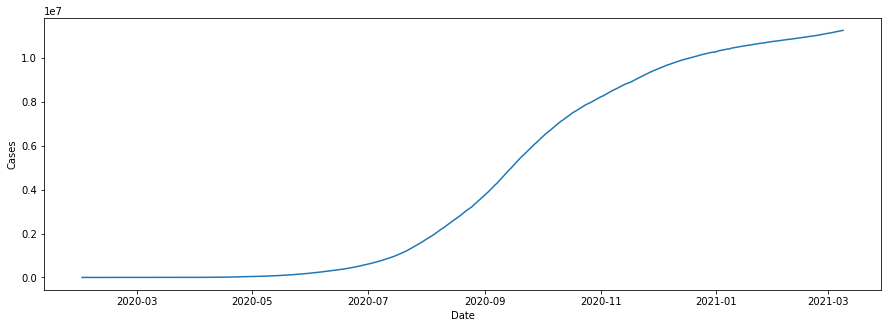

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
plt.plot(df_new['ds'],df_new['y'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [ ]:
import fbprophet

op = fbprophet.Prophet(changepoint_prior_scale=0.5)
op.fit(df_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = op.make_future_dataframe(periods = 30 ,freq = 'D')
forecast = op.predict(forecast)

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-01,1.875995e+03,-1.859585e+04,2.365822e+04
1,2020-02-02,1.878875e+03,-2.042943e+04,2.251006e+04
2,2020-02-03,-1.966084e+03,-2.307356e+04,1.833083e+04
3,2020-02-04,-2.838066e+03,-2.419370e+04,1.824701e+04
4,2020-02-05,-1.378100e+03,-2.212992e+04,2.136133e+04
...,...,...,...,...
428,2021-04-04,1.164762e+07,1.144696e+07,1.184562e+07
429,2021-04-05,1.165830e+07,1.143150e+07,1.186697e+07
430,2021-04-06,1.167195e+07,1.143814e+07,1.189235e+07
431,2021-04-07,1.168794e+07,1.144209e+07,1.192413e+07


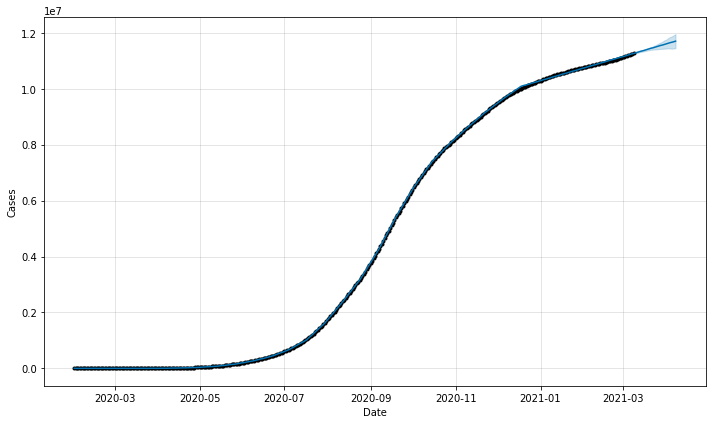

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel='Cases');